In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

In [4]:
src_path = '../DataBook/assignment3_submissions/'
file_name = 'assignment3-29.submit'
src_path += file_name

In [5]:
with open(src_path, 'r') as assignmentFile:
    json_data = json.load(assignmentFile)
    log_field = json_data['submission']['logs'][0]['log']

In [6]:
# Split the log_field into individual JSON objects
logs = log_field.strip().split('\n')

# Create an empty list to hold dictionaries for each log entry
log_list = []

# Iterate over each log entry and append the data to the list
for log in logs:
    data = json.loads(log)
    log_list.append(data)

In [7]:
df = pd.DataFrame(log_list)

In [8]:
df

,t,u,v,_courseId,_assignmentId,^,_#
0,1707770430386,0.0,,CS 196 - Computer Programming II,Assignment 3 - class methods and attributes,NaN,NaN
1,1707770485991,0.0,NaN,NaN,NaN,"[0, 0, Click on the file **assignment3.ipynb**...",NaN
2,1707770491667,0.0,NaN,NaN,NaN,"[0, 0, ']",NaN
3,1707770491820,0.0,NaN,NaN,NaN,"[1, 0, ']",NaN
4,1707770491975,0.0,NaN,NaN,NaN,"[2, 0, ']",NaN
...,...,...,...,...,...,...,...
1785,1708980902549,NaN,NaN,NaN,NaN,NaN,9WGqoB09KL0GRSN8QYEtWLgo5+M=
1786,1708980902911,4.0,for crazy in crazyList: #runs the functions fo...,NaN,NaN,NaN,NaN
1787,1708980902911,5.0,'''\n1. Create some class that includes the fo...,NaN,NaN,NaN,NaN
1788,1708980906832,5.0,,NaN,NaN,NaN,NaN


In [ ]:
not_nan_values = df['v'].dropna()
not_nan_values

0    
Name: v, dtype: object

In [ ]:
# time_chars_dict = {}

# # Processing the DataFrame skipping the first entry
# for timestamp, total_chars, cursor_position in zip(df['t'][1:], df['_cs'].fillna(method='ffill')[1:], df['_c'].fillna(method='ffill')[1:]):
#     if timestamp not in time_chars_dict:
#         time_chars_dict[timestamp] = {'total_chars': [], 'cursor_position': []}
#     time_chars_dict[timestamp]['total_chars'].append(total_chars)
#     time_chars_dict[timestamp]['cursor_position'].append(cursor_position)

# # Saving the dictionary as a JSON file
# output_file = "./DataSet/" + file_name.replace('.submit', '.json')
# with open(output_file, 'w') as f:
#     json.dump(time_chars_dict, f)

# print(f"Dictionary saved to {output_file}")


In [ ]:
# Plotting total_chars_in_file over time
plt.plot(df['t'], df['_cs'].fillna(method='ffill'))
plt.title("Total Chars in File Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Total Chars in File")
plt.show()

KeyError: '_cs'

C:\Users\K-Gen\AppData\Local\Temp\ipykernel_11296\3970496429.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dy_dx = np.gradient(df['_cs'].fillna(method='ffill'), df['t'])
c:\Users\K-Gen\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\K-Gen\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\K-Gen\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\K-Gen\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:1243: RuntimeWarning: invalid value encountered in divide
  b = (

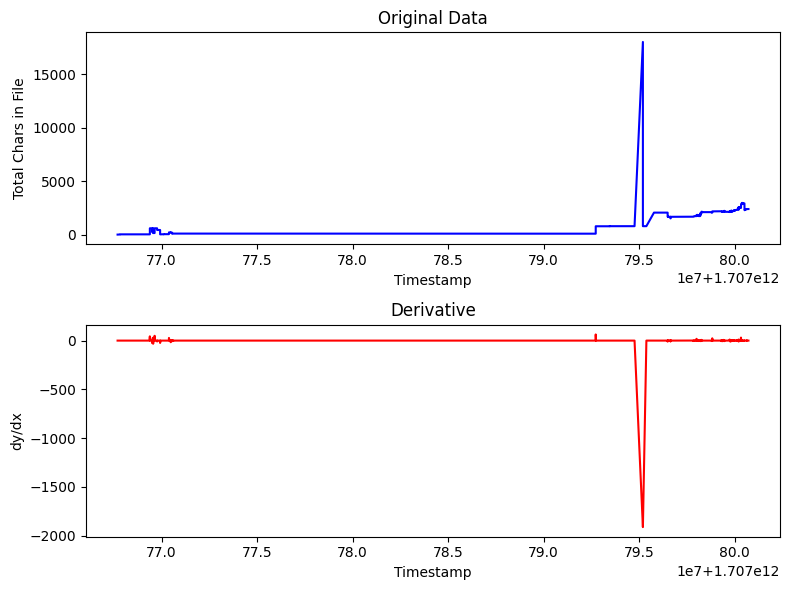

In [ ]:
dy_dx = np.gradient(df['_cs'].fillna(method='ffill'), df['t'])

# Plotting the data
plt.figure(figsize=(8, 6))

# Original data
plt.subplot(2, 1, 1)
plt.plot(df['t'], df['_cs'].fillna(method='ffill'), color='blue')
plt.title("Original Data")
plt.xlabel("Timestamp")
plt.ylabel("Total Chars in File")

# Derivative data
plt.subplot(2, 1, 2)
plt.plot(df['t'], dy_dx, color='red')
plt.title("Derivative")
plt.xlabel("Timestamp")
plt.ylabel("dy/dx")

plt.tight_layout()
plt.show()